<a href="https://colab.research.google.com/github/julianovale/PO450/blob/main/Semana13_PO450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# criação dos dados

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal

# Geracao de dados
mu_1 = [2, 2, 2, 2]
mu_2 = [0, 0, 0, 0]

beta = 0.4
Sigma_1 = [[1.0, beta, beta, beta],[beta, 1.0, beta, beta],[beta, beta, 1.0, beta],[beta, beta, beta, 1.0]]
Sigma_2 = [[1.0, beta, beta, beta],[beta, 1.0, beta, beta],[beta, beta, 1.0, beta],[beta, beta, beta, 1.0]]
fx_1 = multivariate_normal(mu_1, Sigma_1)
fx_2 = multivariate_normal(mu_2, Sigma_2)

N_1 = 500
N_2 = 500

X_1 = fx_1.rvs(N_1)
X_2 = fx_2.rvs(N_2)

X = np.concatenate((X_1,X_2),axis=0)

In [ ]:
# aplicação

# pca_model = PCA() # sem reduzir dimensionalidade (4)
# pca_model = PCA(n_components=3)
pca_model = PCA(n_components=2)
# pca_model = PCA(n_components=1)



Z = pca_model.fit_transform(X)

In [ ]:
Z

array([[ 4.15495244,  0.59225628],
       [ 1.4272692 ,  0.73009716],
       [ 3.8582487 , -0.4789953 ],
       ...,
       [-2.26641224,  0.09202964],
       [-1.16943871,  0.08117577],
       [-2.57937045,  1.06825931]])

In [ ]:
# matriz covariância

CovZ = np.cov(Z.T)
CovZ

array([[ 6.38674778e+00, -6.11678431e-16],
       [-6.11678431e-16,  6.05744350e-01]])

In [ ]:
# correlação

CorrZ = np.corrcoef(Z.T)
CorrZ

array([[ 1.00000000e+00, -3.10984396e-16],
       [-3.10984396e-16,  1.00000000e+00]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Explicação (%)')

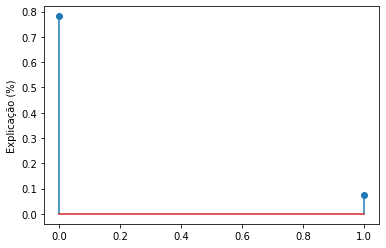

In [ ]:
# perfil de autovalores

perfil_autovalores = pca_model.explained_variance_ratio_
plt.stem(perfil_autovalores)
plt.ylabel("Explicação (%)")

Text(0, 0.5, 'Explicação (%)')

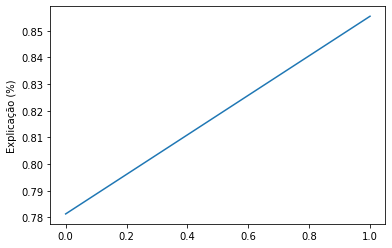

In [ ]:
# perfil de autovalores acumulados

perfil_acumulado = np.cumsum(perfil_autovalores)
plt.plot(perfil_acumulado)
plt.ylabel("Explicação (%)")

In [ ]:
# "Z reduzido"

Zr = Z[:, :2]

In [ ]:
Zr

array([[ 4.15495244,  0.59225628],
       [ 1.4272692 ,  0.73009716],
       [ 3.8582487 , -0.4789953 ],
       ...,
       [-2.26641224,  0.09202964],
       [-1.16943871,  0.08117577],
       [-2.57937045,  1.06825931]])

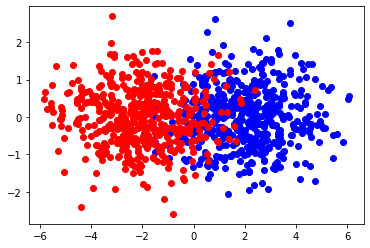

In [ ]:
plt.plot(Z[:N_1,0], Z[:N_1,1], 'bo')
plt.plot(Z[N_1:,0], Z[N_1:,1], 'ro')

In [ ]:
W = pca_model.components_
W

array([[ 0.51157668,  0.48301489,  0.49460309,  0.51024866],
       [-0.82314356,  0.39555732,  0.40290755,  0.06028758]])

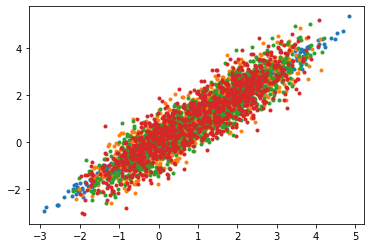

In [ ]:
# reconstruindo X

Xrecons = pca_model.inverse_transform(Zr)
plt.plot(Xrecons, X, '.')